## Summarize Release time

compute emission duration, non-emission duration, total duration

In [1]:
from help_functions import load_release_time_summary

number_of_date, number_of_comp_hours, number_of_release_hours, percentage_of_release_hours = load_release_time_summary()
print(
"""
Over the course of {} days, we conducted {} hours of testing. Known periods of zero emissions are included in the testing 
period, encompassing overnight periods and weekends (some gas releases were conducted on weekends). In total, gas was 
being released {:.2f}\% of the total testing time, or {:.2f} hours.
""".format(int(number_of_date) - 6, int(number_of_comp_hours), percentage_of_release_hours * 100, int(number_of_release_hours))
)


Over the course of 46 days, we conducted 1060 hours of testing. Known periods of zero emissions are included in the testing 
period, encompassing overnight periods and weekends (some gas releases were conducted on weekends). In total, gas was 
being released 9.39\% of the total testing time, or 99.00 hours.



## Summarize distribution of True Events

minumum, average, and maximum release rate, duration of emission or non-emission events

In [1]:
from help_functions import load_true_events_summary

results = load_true_events_summary()

string_format = """
1. the lowest instantaneous release rate was {:.3f} kg CH4/hr and the highest was {:.3f} kg CH4/hr. 
2. there were a total of {} Stanford defined releases.
3. Non-release periods between events ranged in length from {:.2f} to {:.2f} minutes.
4. The longest periods of non-emissions were extended periods before and alter testing, typically {:.2f} hours in duration.
5. The event with the smallest range of releases was {:.2f} minutes long, with releases ranging from {:.3f} CH4/hr to {:.3f} CH4/hr. 
    Incontrast, the event with the largest range of releases was {:.2f} minutes long, with releases ranging from {:.3f} CH4/hr to {:.3f} CH4/hr. 
"""

print("Before wind transpose model:")
before_data = [
    results["before"]["min_release_rate_of_P_events"],
    results["before"]["max_release_rate_of_P_events"],
    results["before"]["number_of_P_events"],
    results["before"]["min_duration_of_N_events"],
    results["before"]["max_duration_of_N_events"],
    results["before"]["N_max_duration"],
    results["before"]["minP_duration"],
    results["before"]["minP_min_rate"],
    results["before"]["minP_max_rate"],
    results["before"]["maxP_duration"],
    results["before"]["maxP_min_rate"],
    results["before"]["maxP_max_rate"]
]
print(string_format.format(*before_data))

print("After wind transpose model:")
after_data = [
    results["after"]["min_release_rate_of_P_events"],
    results["after"]["max_release_rate_of_P_events"],
    results["after"]["number_of_P_events"],
    results["after"]["min_duration_of_N_events"],
    results["after"]["max_duration_of_N_events"],
    results["after"]["N_max_duration"],
    results["after"]["minP_duration"],
    results["after"]["minP_min_rate"],
    results["after"]["minP_max_rate"],
    results["after"]["maxP_duration"],
    results["after"]["maxP_min_rate"],
    results["after"]["maxP_max_rate"]
]
print(string_format.format(*after_data))

Before wind transpose model:

1. the lowest instantaneous release rate was 0.037 kg CH4/hr and the highest was 2830.211 kg CH4/hr. 
2. there were a total of 237 Stanford defined releases.
3. Non-release periods between events ranged in length from 1.00 to 1439.98 minutes.
4. The longest periods of non-emissions were extended periods before and alter testing, typically 114.23 hours in duration.
5. The event with the smallest range of releases was 1.00 minutes long, with releases ranging from nan CH4/hr to nan CH4/hr. 
    Incontrast, the event with the largest range of releases was 213.95 minutes long, with releases ranging from 3.782 CH4/hr to 236.545 CH4/hr. 

After wind transpose model:

1. the lowest instantaneous release rate was 0.037 kg CH4/hr and the highest was 2830.211 kg CH4/hr. 
2. there were a total of 107 Stanford defined releases.
3. Non-release periods between events ranged in length from 1.02 to 1439.98 minutes.
4. The longest periods of non-emissions were extended peri

# The longest periods of non-emissions

In [3]:
from help_functions import get_longest_non_emission
max_duration, start_time, end_time = get_longest_non_emission()

print("The longest periods of non-emissions were extended periods before and alter testing, typically {} hours in duration, from {} to {}.".format(
    max_duration, start_time, end_time))

The longest periods of non-emissions were extended periods before and alter testing, typically 114.23222222222222 hours in duration, from 2022-11-23 22:10:22 to 2022-11-28 16:24:18.


## The greatest variability of mean release rate of all events

In [4]:
from help_functions import load_greatest_variability_rate_of_true_events

max_variability_rate, min_mean_release, max_mean_release = load_greatest_variability_rate_of_true_events()
print("The greatest variability, minimum average and maximum average of events is: {:.2f}, {:.2f} and {:.2f} ".format(max_variability_rate, min_mean_release, max_mean_release))

min release event:  2022-11-22 21:27:13 2022-11-22 22:18:25
max release event:  2022-11-18 17:48:58 2022-11-18 18:30:49
The greatest variability, minimum average and maximum average of events is: 1443.62, 0.81 and 1444.43 


## Summarize Time-based Sample size

In [5]:
from help_functions import load_time_based_samples_summary

sample_size = load_time_based_samples_summary()["samples"]
print("Sample size for sensors:")
for sensor, size in sample_size.items():
    print(f"{sensor}: {size}")

min_samples = min(sample_size.values())
print(f"Minimum sample size: {min_samples}")
max_samples = max(sample_size.values())
print(f"Maximum sample size: {max_samples}")
print("Sample size in the time-based detection varies from {} to {} measurements.".format(min_samples, max_samples))

/Users/zhl/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Sample size for sensors:
Andium: 3128980
Canary: 1354747
Ecoteco: 2639159
Kuva: 914142
Oiler: 1081843
Minimum sample size: 914142
Maximum sample size: 3128980
Sample size in the time-based detection varies from 914142 to 3128980 measurements.


## Plot end points of non-zero release period

Generating a plot illustrating the end point of methane gas drift during non-zero release periods post-application of the wind transport model

/Users/zhl/Documents/个人项目/曙光北京2/气体释放/github/Continuous-Monitoring-_-V2/src/paper_plots/help_functions.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internal_df_windspeed["sum_u_east"] = internal_df_windspeed["u_east"].cumsum()
/Users/zhl/Documents/个人项目/曙光北京2/气体释放/github/Continuous-Monitoring-_-V2/src/paper_plots/help_functions.py:443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internal_df_windspeed["sum_u_north"] = internal_df_windspeed["u_north"].cumsum()


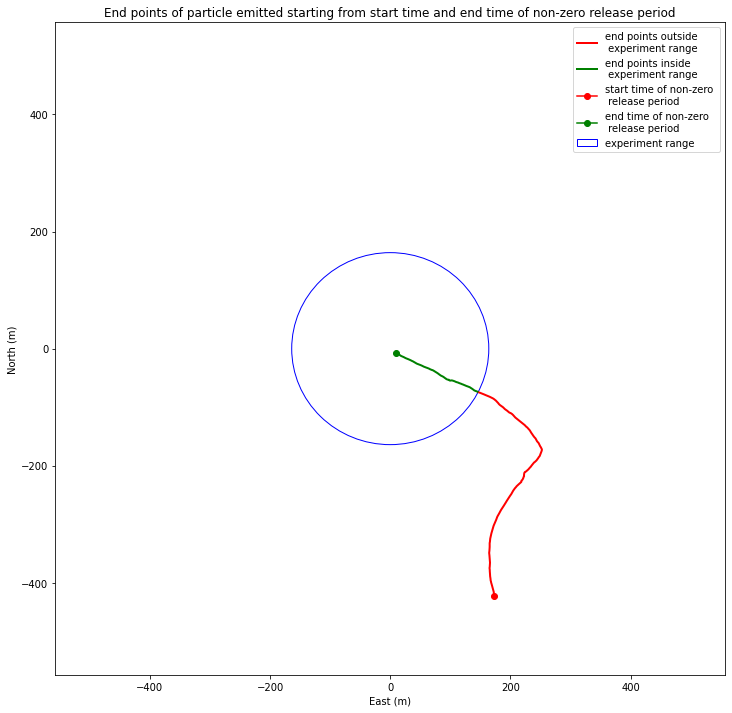

In [6]:
from help_functions import plot_end_points
import matplotlib.pyplot as plot

non_zero_release_start = "2022-10-25 17:17:38"
non_zero_release_end = "2022-10-25 17:23:50"

next_non_zero_release_start = "2022-10-25 17:23:55"

plot_end_points(non_zero_release_start, non_zero_release_end, next_non_zero_release_start)
plot.show()

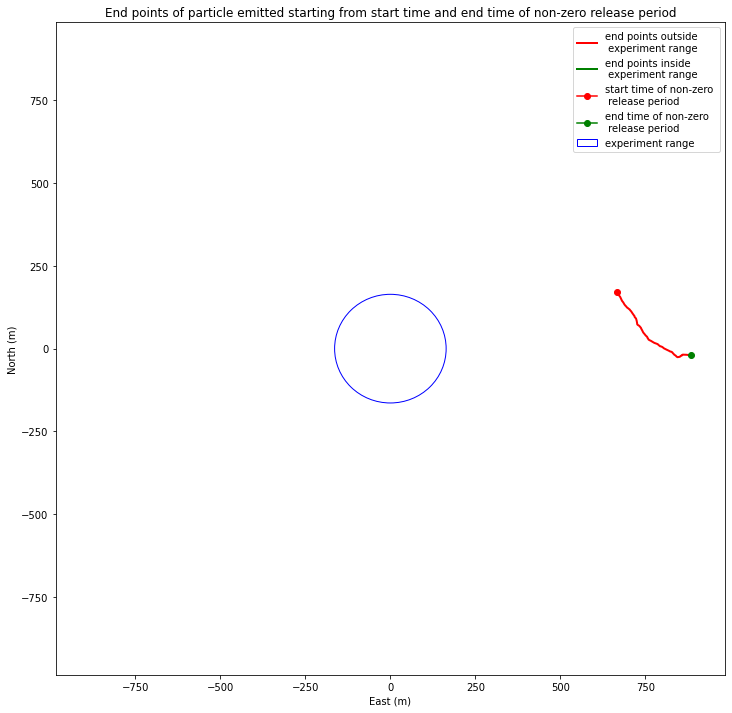

In [7]:
from help_functions import plot_end_points
import matplotlib.pyplot as plot

non_zero_release_start = "2022-10-25 18:12:41"
non_zero_release_end = "2022-10-25 18:19:01"

next_non_zero_release_start = "2022-10-25 18:31:11"

plot_end_points(non_zero_release_start, non_zero_release_end, next_non_zero_release_start)
plot.show()

# Statistical data for error bars

In [8]:
from help_functions import load_statistical_data_of_error_bars
statistical_df = load_statistical_data_of_error_bars()
statistical_df

,sensor,type,count,min,max,mean,std
0,Canary,Uncertainty of Release,10,0.0515276,24.3549,5.02877,7.46942
1,Canary,Uncertainty of Report,10,0,0,0,0
2,Oiler,Uncertainty of Release,13,0.130227,25.839,4.65423,6.88117
3,Oiler,Uncertainty of Report,13,0.0459906,0.769492,0.29745,0.227182
4,Qube,Uncertainty of Release,27,0.0515276,25.839,3.67218,5.27148
5,Qube,Uncertainty of Report,27,0,17.9635,2.07862,4.47882
6,Sensirion,Uncertainty of Release,21,0.0540853,25.839,5.40484,7.47016
7,Sensirion,Uncertainty of Report,21,0.15,65.8,21.5289,21.9926
8,Soofie,Uncertainty of Release,26,0.0623409,25.839,4.28494,6.35168
9,Soofie,Uncertainty of Report,26,0,0,0,0
